<a href="https://colab.research.google.com/github/Julian-Palacios/PMEF/blob/main/01_Viga_Quad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request 
urllib.request.urlretrieve("https://raw.githubusercontent.com/Julian-Palacios/PMEF/main/FEM_funciones_aux.py", "FEM_funciones_aux.py")
urllib.request.urlretrieve ('https://jpi-ingenieria.com/enrrique/Lima66NS15-35_FF.txt', 'Lima66NS15-35_FF.txt')

('Lima66NS15-35_FF.txt', <http.client.HTTPMessage at 0x7f37ed980b90>)

In [2]:
from FEM_funciones_aux import *
import time
from scipy.sparse.linalg import spsolve, eigsh
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [3]:
init_model()

<p>Se realizan las configuraciones iniciales del modelo que se analizará</p>

In [4]:
ProblemData(SpaceDim=2, pde="Elasticity")

ElementData(elemDof=2,
            elemNodes=4,
            elemInt=4,
            elemType="Quad4",
            massInt=4,
            massMat='lumped')

fc = 210 * kgf / cm**2
E = 15000 * (fc / (kgf / cm**2))**0.5 * kgf / cm**2

ModelData(E=E,
          v=0.25,
          thickness=0.5,
          density=2400 * kg / m**3,
          selfWeight=0.0,
          gravity=[0.0, 0.0, -1])

<p>Mediante la función GenQuadMesh_2D generamos definimos <mark>la longitud (L) en la dirección X</mark> y <mark>la altura (H) en la dirección Y</mark> del modelo, además indicamos la <mark>cantidad de elementos que tendrá en la dimensión más corta entre L y H</mark></p>

In [5]:
L, H, lc = 1 * m, 1 * m, 4

GenQuadMesh_2D(L, H, lc)

================Mesh================
nx = 4, dx = 0.25, ny = 4, dy = 0.25


<p>Ploteamos una vista de la malla que se generó anteriormente con la función <mark>GenQuadMesh_2D</mark></p>

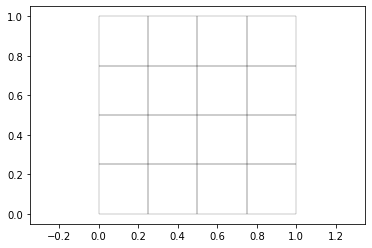

In [6]:
plot_model_mesh()

In [7]:
DC_nodes(dir='x', dist=0, dof=(1, 2), lim=0.001)
NC_node(xyz=(L, H), force=10 * tonf, dof=[1], lim=0.001)

[[0 1 1 0]
 [1 1 1 0]
 [2 1 1 0]
 [3 1 1 0]
 [4 1 1 0]
 [0 1 2 0]
 [1 1 2 0]
 [2 1 2 0]
 [3 1 2 0]
 [4 1 2 0]]
[[2.40000e+01 0.00000e+00 1.00000e+00 9.80665e+04]]


<p> Se ensamblan las matrices de <mark>rigidez y masa</mark>, así mismo se genera el vector de fuerzas</p>

In [8]:
AssembleMatrix('MatrixK')
AssembleMatrix('ConcentratedMass')
AssembleVector()

Matriz K calculada
Matriz M calculada


<p>Se aplican las condiciones de borde,  <mark>Dirichlet</mark> (desplazamientos) y <mark>Neumann</mark> (fuerzas).

In [9]:
ApplyBC()

elem_dof 2
[[0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+00 2.00000e+00 0.00000e+00]
 [1.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00]
 [1.00000e+00 1.00000e+00 2.00000e+00 0.00000e+00]
 [2.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00]
 [2.00000e+00 1.00000e+00 2.00000e+00 0.00000e+00]
 [3.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00]
 [3.00000e+00 1.00000e+00 2.00000e+00 0.00000e+00]
 [4.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00]
 [4.00000e+00 1.00000e+00 2.00000e+00 0.00000e+00]
 [2.40000e+01 0.00000e+00 1.00000e+00 9.80665e+04]]
CB Dirichlet, DOF: 0
CB Dirichlet, DOF: 1
CB Dirichlet, DOF: 2
CB Dirichlet, DOF: 3
CB Dirichlet, DOF: 4
CB Dirichlet, DOF: 5
CB Dirichlet, DOF: 6
CB Dirichlet, DOF: 7
CB Dirichlet, DOF: 8
CB Dirichlet, DOF: 9
CB Neumann, DOF: 48


<p>Se realiza el análisis Estático con la función <mark>Analysis()</mark>.

In [10]:
Analysis() # Analyse

<p>Se plotea la deformada de la estructura y se indica a traves a traves de la barra de colores el desplazamiento en cada uno de sus nodos en la <mark>dirección X</mark> </p>

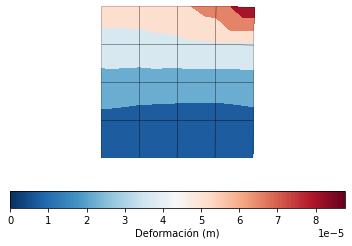

In [11]:
plot_model_deform(dir='x', FS=100)

<p>Se plotea la deformada de la estructura y se indica a traves a traves de la barra de colores el desplazamiento en cada uno de sus nodos en la <mark>dirección Y</mark> </p>

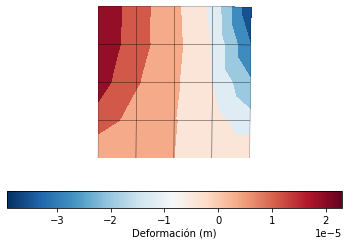

In [12]:
plot_model_deform(dir='y', FS=100)

In [13]:
Reduc_Matrix()

In [14]:
Modal_Analysis()

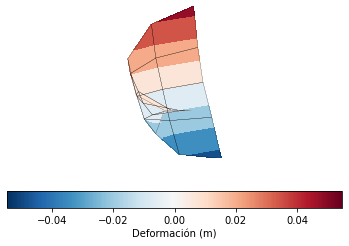

In [15]:
plot_modes(mode=3, FS=50)

In [16]:
AssemblyDamping()


w0,w20:1989.928263608607,16518.848139217116
α,β=4605.803589943894,5.248277498787211e-06


In [17]:
ug = np.genfromtxt("Lima66NS15-35_FF.txt") / 100
dt = 0.02

In [18]:
MDOF_LTH(ug, dt)

Paso:	100
Tiempo:	2.0(s)
Paso:	200
Tiempo:	4.0(s)
Paso:	300
Tiempo:	6.0(s)
Paso:	400
Tiempo:	8.0(s)
Paso:	500
Tiempo:	10.0(s)
Paso:	600
Tiempo:	12.0(s)
Paso:	700
Tiempo:	14.0(s)
Paso:	800
Tiempo:	16.0(s)
Paso:	900
Tiempo:	18.0(s)


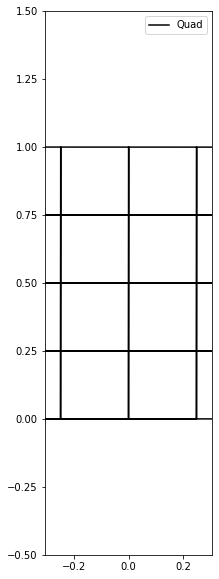

In [19]:
dinamic_plot(FS=10000)